In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv')
df = df.drop(df.columns[0], axis=1)

In [8]:
X = df.drop(columns=['ER'])
y = df['ER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Score R2 Final : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE Final : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Score R2 Final : 0.9985
RMSE Final : 0.1855


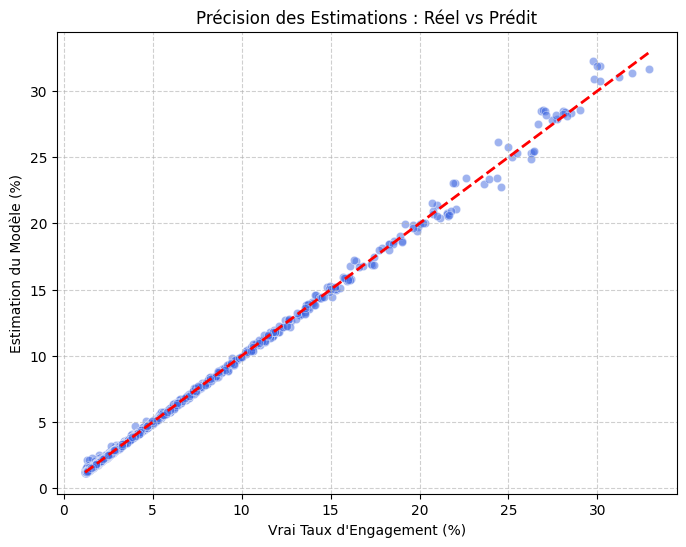

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Précision des Estimations : Réel vs Prédit")
plt.xlabel("Vrai Taux d'Engagement (%)")
plt.ylabel("Estimation du Modèle (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
import joblib as jb
jb.dump(model, 'model.pkl')

['model.pkl']

<Figure size 1000x800 with 0 Axes>

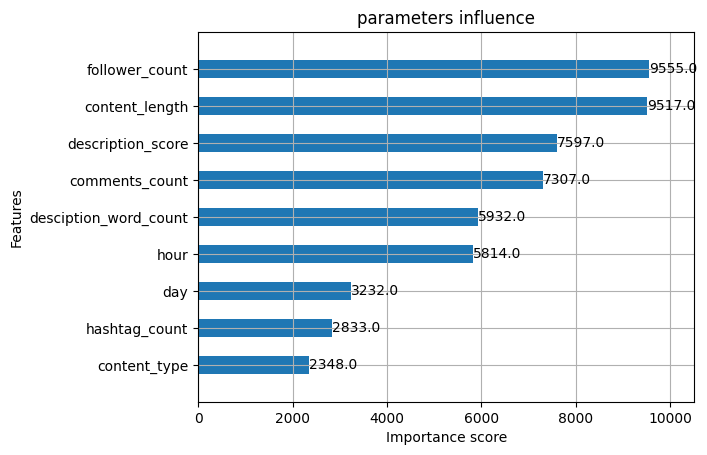

In [14]:
plt.figure(figsize=(10, 8))

xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("parameters influence")
plt.savefig('params.png',dpi=300, bbox_inches='tight')
plt.show()